# KNearest Neighbour for Collabarative Recommended System 
<img src='types.png'/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
movies = pd.read_csv('movies.csv', dtype = {'movieId': 'int32', 'title': 'str', 'genres': 'str'})
rating = pd.read_csv('ratings.csv', usecols=['userId', 'movieId', 'rating'], dtype = {'userId': 'int32', 'movieId':'int32', 'rating':'float32'})

In [21]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
rating.head()


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [24]:
df = movies.merge(rating, on='movieId')
df.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [41]:
df = df.dropna(axis = 0, subset = ['title'])
movie_rating_count = (df.groupby('title')['rating'].
                    count().
                    reset_index().
                    rename(columns={'rating': 'total_rating_count'})
                    [['title', 'total_rating_count']]
                )

In [42]:
movie_rating_count.head()

,title,total_rating_count
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [58]:
rating_count = df.merge(movie_rating_count, left_on = 'title', right_on = 'title', how = 'left')
rating_count.head()

,movieId,title,genres,userId,rating,total_rating_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,215


In [60]:
rating_count['total_rating_count'].describe()

count    100836.000000
mean         58.758777
std          61.965384
min           1.000000
25%          13.000000
50%          39.000000
75%          84.000000
max         329.000000
Name: total_rating_count, dtype: float64

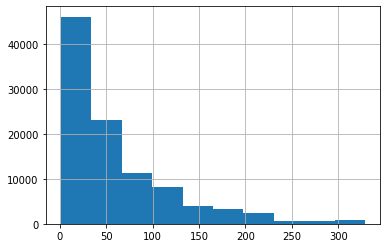

In [159]:
rating_count['total_rating_count'].hist()

In [133]:
rating_popular_movie = rating_count[rating_count['total_rating_count']>=50]
rating_popular_movie.head()

,movieId,title,genres,userId,rating,total_rating_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,215


In [73]:
rating_popular_movie.shape

(41362, 6)

In [74]:
movie_rating_df = rating_popular_movie.pivot_table(index='title', columns='userId', values='rating').fillna(0)
movie_rating_df.head()
    

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


In [153]:
#  create an array of an pivot table

from scipy.sparse import csr_matrix

movie_rating_df_matrics = csr_matrix(movie_rating_df.values)

In [154]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm='brute') # Unsupervised Learning
model_knn.fit(movie_rating_df_matrics)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [155]:
query_movie = np.random.choice(movie_rating_df.shape[0])
query_movie

41

In [156]:
distances, indices = model_knn.kneighbors(movie_rating_df.iloc[query_movie,:].values.reshape(1, -1), n_neighbors=6)
                                                     

In [160]:
distances

array([[0.        , 0.22368181, 0.36176658, 0.40315187, 0.4647256 ,
        0.4695589 ]], dtype=float32)

In [161]:
indices

array([[ 41,  40,  39, 216, 171, 271]])

In [157]:
for i in range(0, len(distance[0])):
    if i==0:
        print('recommended for {0}:\n'.format(movie_rating_df.index[query_movie]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_rating_df.index[indices[0][i]], distances.flatten()[i]))
        
        
        

recommended for Back to the Future Part III (1990):

1: Back to the Future Part II (1989), with distance of 0.22368180751800537:
2: Back to the Future (1985), with distance of 0.3617665767669678:
3: Indiana Jones and the Temple of Doom (1984), with distance of 0.40315186977386475:
4: Ghostbusters (a.k.a. Ghost Busters) (1984), with distance of 0.4647256135940552:
5: Minority Report (2002), with distance of 0.4695588946342468:
